# Custom exploration of Eniac's database

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Functions_module import check_table

In [143]:
# orderlines_old = pd.read_csv('data/eniac/orderlines.csv')
# products_old = pd.read_csv('data/eniac/products.csv')
# orders_old = pd.read_csv('data/eniac/orders.csv')

In [153]:
orderlines = pd.read_csv('data/eniac/orderlines_cl_joan.csv')
products = pd.read_csv('data/eniac/products_cl_joan.csv')
orders = pd.read_csv('data/eniac/orders_cl_joan.csv')
brands = pd.read_csv('data/eniac/brands_cl_joan.csv')

In [154]:
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

# Orderlines info

In [5]:
# check_table(orderlines)

In [6]:
# check_table(orderlines_old)

# Products info

In [7]:
# check_table(products)

In [8]:
# check_table(products_old)

## Orders info

In [9]:
# check_table(orders)

In [10]:
# check_table(orders_old)

## How many orders are there?

In [155]:
orders.order_id.nunique()

204691

## How many products are there?

In [156]:
products.sku.nunique()

10579

## What period of time do these orders comprise?

In [157]:
orders.created_date.agg(['min', 'max'])

min   2017-01-01 00:07:19
max   2018-03-14 13:58:36
Name: created_date, dtype: datetime64[ns]

## How many orders are Completed?

In [158]:
completed_orders = orders.loc[orders.state == 'Completed']

In [159]:
completed_orders

,order_id,created_date,total_paid,state,check_orders
1,241423,2017-11-06 13:10:02,136.15,Completed,True
2,242832,2017-12-31 17:40:03,15.76,Completed,True
3,243330,2017-02-16 10:59:38,84.98,Completed,True
5,245275,2017-06-28 11:35:37,149.00,Completed,True
6,245595,2017-01-21 12:52:47,112.97,Completed,True
...,...,...,...,...,...
204403,527042,2018-03-14 11:47:50,18.98,Completed,True
204423,527070,2018-03-14 11:50:48,24.97,Completed,True
204426,527074,2018-03-14 11:51:42,24.97,Completed,True
204444,527096,2018-03-14 11:58:40,34.96,Completed,True


In [160]:
orders.loc[orders.state == 'Completed'].state.value_counts() / orders.order_id.count()

Completed    0.227465
Name: state, dtype: float64

Completed orders make 20% of all orders

In [161]:
orders_by_state=(
    orders
    .groupby('state')
    .count()
    .reset_index()
)

In [162]:
orders_by_state

,state,order_id,created_date,total_paid,check_orders
0,Cancelled,7192,7192,7192,7192
1,Completed,46560,46560,46560,46560
2,Pending,14361,14361,14361,14361
3,Place Order,28579,28579,28579,28579
4,Shopping Basket,107999,107999,107999,107999


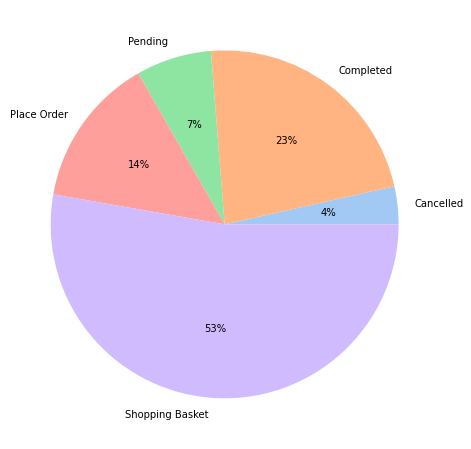

In [163]:
plt.subplots(figsize=(12, 8))
colors = sns.color_palette('pastel')[0:6]
plt.pie(orders_by_state.order_id, labels = orders_by_state.state, colors = colors, autopct='%.0f%%')
plt.show()

## How should revenue be computed?

Revenue for entire database

In [164]:
completed_orders.total_paid.sum()

15907059.889999995

Revenue for each year:

In [165]:
completed_orders.assign(year = orders.created_date.dt.strftime('%Y')).groupby('year')['total_paid'].agg('sum')

year
2017    12399642.40
2018     3507417.49
Name: total_paid, dtype: float64

## Revenue by brands

In [166]:
products_brands =(
    products.assign(short = products.sku.str[0:3])
            .merge(brands,how='left')

)

In [167]:
orderlines_products_brands = (
    orderlines
            .merge(products_brands,how='left')
)

In [168]:
orderlines_products_brands_orders = (
    orderlines_products_brands
                .merge(orders,how='left')
)

In [170]:
completed_orders_big_merge = (
    orderlines_products_brands_orders
        .query("state == 'Completed'")
        .groupby('long')
        .sum('total_sum')
        .reset_index()
        .sort_values('total_paid', ascending = False)
)

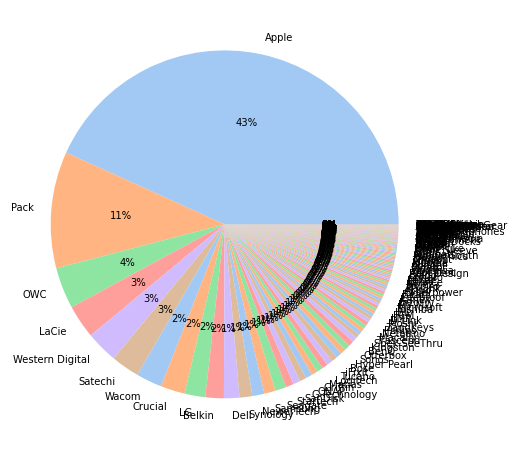

In [172]:
plt.subplots(figsize=(12, 8))
colors = sns.color_palette('pastel')[0:6]
plt.pie(completed_orders_big_merge.total_paid, labels = completed_orders_big_merge['long'], colors = colors, autopct='%.0f%%')
plt.show()

In [173]:
completed_orders_big_merge_by_product = (
    orderlines_products_brands_orders
        .query("state == 'Completed'")
        .groupby('sku')
        .sum('total_sum')
        .reset_index()
        .sort_values('total_paid', ascending = False)
    .head(1000)
)

In [174]:
completed_orders_big_merge_by_product.total_sum.sum()

12394095.680000002

In [175]:
list_of_products = completed_orders_big_merge_by_product.sku.tolist()

In [176]:
products_for_explore = products[products.sku.isin(list_of_products)]

In [177]:
# products_for_explore.to_csv('data/eniac/products_to_explore.csv',index=False)

In [104]:
completed_orders_big_merge_by_product['sku'].str[0:3].unique()

array(['APP', 'LGE', 'SAT', 'WDT', 'PAC', 'CAD', 'LIB', 'SAM', 'HTE',
       'CRU', 'NTE', 'MAT', 'WAC', 'AP2', 'DLL', 'SYN', 'SNS', 'OWC',
       'LAC', 'OTT', 'SEA', 'NEA', 'MIC', 'BEL', 'BOS', 'MMW', 'QNA',
       'STA', 'MOX', 'LOG', 'CYB', 'GRT', 'MIN', 'TOS', 'EIZ', 'MAC',
       'LMP', 'WOE', 'SPE', 'BNQ', 'IFX', 'TRA', 'NIE', 'SAN', 'FIT',
       'RAI', 'TRN', 'GTE', 'DJI', 'ZAG', 'WHO', 'AKI', 'PHI', 'KEN',
       'KAN', 'ELG', 'DRO'], dtype=object)

In [178]:
completed_orders_big_merge_by_product.total_sum.sum()

12394095.680000002

In [179]:
# plt.subplots(figsize=(12, 8))
# colors = sns.color_palette('pastel')[0:6]
# plt.pie(completed_orders_big_merge_by_product.total_paid, labels = completed_orders_big_merge_by_product['sku'], colors = colors, autopct='%.0f%%')
# plt.show()

## Creating categories

In [273]:
# Accessories = ('remote|scale|elgato|d-link|adoint|satellite|gloves|pointer|strap|sport|wacom bamboo|alarm|airbrush|backpack|briefcase|camera|case|headphones|headset|keyboard|microphone|minidp|monitor|mouse|pen|pencil|screen protector|sleeve|speaker|stand|star wars|station|support|thermostat|trackpad|apple tv|drone|lamp|p2418d|radiator|stabilizer|keypad|bag|cover|beats')

In [292]:
Accessories = ('kensington|belt|deportiva|alarm|flypad|netcam|dell|celly|ik multimedia|glucÃ­metro|u2913wm dell 29 "ultrasharp fhd ips|scanner|netstream|webcam|bookarc|maleta|robot|blood pressure|netgear satellite|led|bracelet|gloves|polaroid|thermometer|home music|sport|living colors|pocket|game capture|laser|strap|scale|detector|gopro|pointer|riser|stylus|cleaner|case|fairbrush|backpack|casing|briefcase|camera|headphones|headset|keyboard|microphone|minidp|monitor|mouse|pen|pencil|screen protector|sleeve|speaker|stand|star wars|station|support|thermostat|trackpad|apple tv|drone|lamp|p2418d|radiator|stabilizer|keypad|bag|cover')

In [224]:
iPad = ('ipad')

In [225]:
iPhone = ('iphone')

In [294]:
Licenses_and_waranties = ('siri|parallels desktop|quarkpress|microsoft office|repair|adobe|applecare|license|protection|software|installation')

In [247]:
Mac = ('imac|macbook|mac mini|mac')

In [325]:
Other_devices = ('tablet|wacom intuos|ninebot|wacom cintiq|wacom mobilestudio')

In [271]:
# Parts = ('sonnet|ifixit|adapter|battery|box|bulb|cable|charger|cleanser|converter|dimmer|displayport|dock|kit|lightstrips|rack|raid|sensor|sonnet allegro|startech hdmi|subwoofer|superdrive|switch|usb-c to|glass|charging|dock|hub|powercube|tools|ups|wireless base|ports|lightning|powerhouse base|nonda mini|satechi multiport|adapatdor')

In [291]:
Parts = ('siren|devolo|hirise|hoco|startech|access point|replacement|bike|ifixit|bell|wi-fi|sonar fish|linksys|newertech|control|photo|hotspot|sonos|locator keys|alarm system|accelsior|video capture|smart plug|spare ball|calibrator|locator bluetooth|security|devolo dlan 500av|router|airport|lock|adapter|battery|box|bulb|cable|charger|cleanser|converter|dimmer|displayport|dock|kit|lightstrips|rack|raid|sensor|sonnet|allegro|startech hdmi|subwoofer|superdrive|switch|usb-c to|glass|charging|dock|hub|powercube|tools|ups|wireless base|ports|lightning|powerhouse base|nonda mini|satechi multiport|adapatdor')

In [284]:
# Storage = ('synology|kingston|samsung|owc mercury|seagate backup|wd blue|synology|20tb|256gb samsung|3tb|512gb samsung ssd|8tb|capsule|datatraveler|disk 500gb|hard disk|hard drive|memory|qnap|rackstation|rugged|sandisk|sasmsung 1tb|server|transcend|1tb-c|crucial|G-drive|synology ram|cloud|storage unit|pendrive|hypedrive|synology ds1517')

In [293]:
Storage = ('seagate|sshd|1tb|wd red|drobo b810i iscsi san 8 bays|flash drive|western digital|ssd|owc mercury |external enclosure |thunderbolt|4tb|sdhc|samsung pro + sdhc|lexar premium sdhc|newertech ministack|electra 6g ssd 960gb|jumpdrive|passport|wd blue 500gb|ram|nas|20tb|256gb samsung|3tb|512gb samsung ssd|8tb|capsule|datatraveler|disk 500gb|hard disk|hard drive|memory|qnap|rackstation|rugged|sandisk|sasmsung 1tb|server|transcend|1tb-c|crucial|G-drive|synology ram|cloud|storage unit|pendrive|hypedrive|synology ds1517|synology')

In [237]:
iPod = ('ipod')

In [295]:
Smartwatch = ('withings|watch|fitbit')

In [205]:
import numpy as np

In [212]:
products = products.assign(Category = '')

In [326]:
condlist = [
            products.name.str.contains(Accessories, case=False),
            products.name.str.contains(Parts, case=False),
            products.name.str.contains(Licenses_and_waranties, case=False),
            products.name.str.contains(Other_devices, case=False),
            products.name.str.contains(Storage, case=False),
            products.name.str.contains(Smartwatch, case=False),
            products.name.str.contains(iPad, case=False),
            products.name.str.contains(iPhone, case=False),
            products.name.str.contains(Mac, case=False),
            products.name.str.contains(iPod, case=False)
]

choicelist = [
            'Accessories',
            'Parts',
            'Licenses_and_waranties',
            'Other_devices',
            'Storage',
            'Smartwatch',
            'iPad',
            'iPhone',
            'Mac',
            'iPod'
]

products.Category = np.select(condlist, choicelist, default='Uncategorized')

In [327]:
products.groupby('Category').count()

,sku,name,desc,price,max_price_orderlines
Category,,,,,
Accessories,4888,4888,4884,4686,108
Licenses_and_waranties,144,144,144,101,33
Mac,144,144,144,143,0
Other_devices,45,45,45,43,0
Parts,1945,1945,1943,1818,88
Smartwatch,30,30,30,30,0
Storage,2893,2893,2892,2692,105
Uncategorized,65,65,65,64,1
iPad,42,42,42,41,0


In [328]:
uncat = products[products.Category == 'Uncategorized'].sort_values('price',ascending=False)

In [357]:
orderlines_orders_products = orderlines.merge(orders,how='left').merge(products,how='left')

In [358]:
revenue_by_categories = (
        orderlines_orders_products
            .query("state == 'Completed'")
            .groupby('Category')
            .sum('total_sum')
            .reset_index()
            .sort_values('total_sum')
)

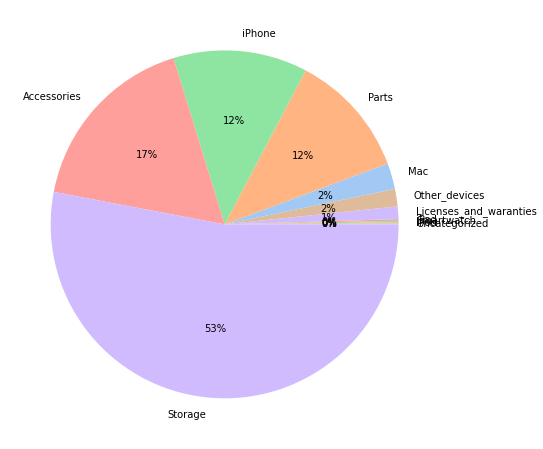

In [359]:
plt.subplots(figsize=(12, 8))
colors = sns.color_palette('pastel')[0:6]
plt.pie(revenue_by_categories.total_sum, labels = revenue_by_categories.Category, colors = colors, autopct='%.0f%%')
plt.show()

In [361]:
price_distribution_categories = (
    orderlines_orders_products
        .query("state == 'Completed'")
)

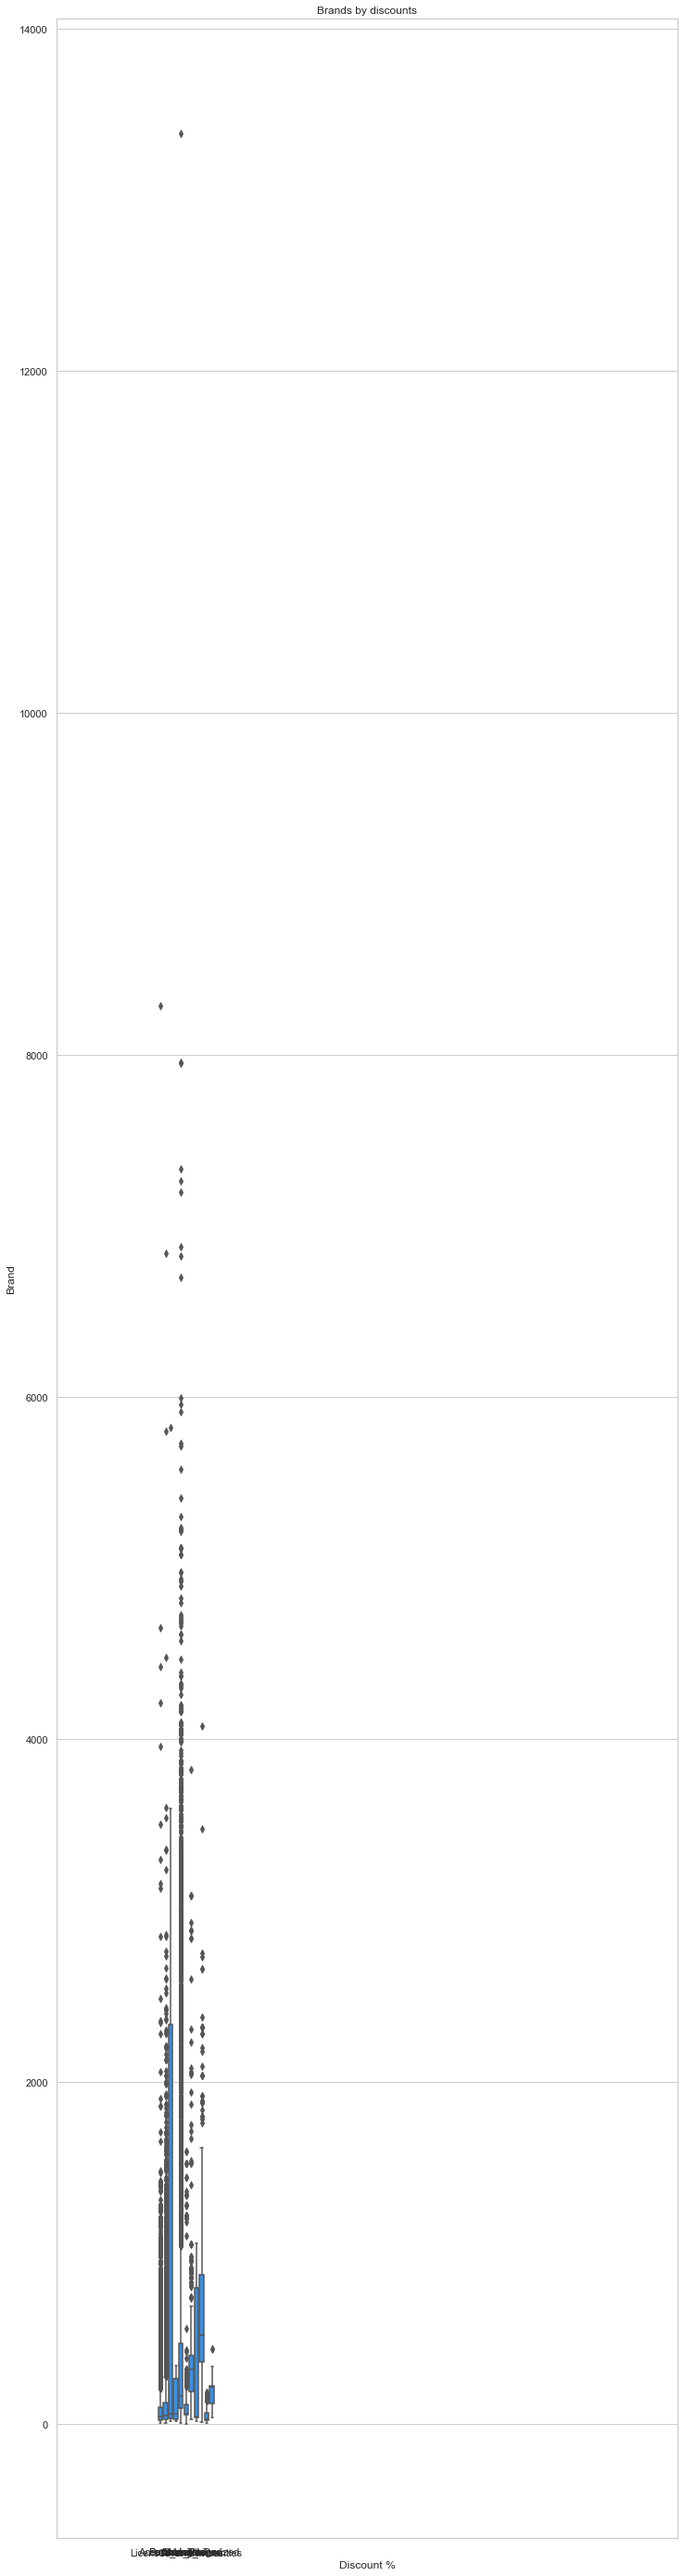

In [362]:
sns.set_theme(style="whitegrid")
plt.subplots(figsize=(12, 50))

sns.boxplot(data=price_distribution_categories, x='Category', y='total_sum', color='dodgerblue')

plt.xlim(-20, 100)
plt.xlabel('Discount %')
plt.ylabel('Brand')
plt.title('Brands by discounts')
plt.show()